<a href="https://colab.research.google.com/github/ananya15082002/Colab/blob/main/Heart_Disease_Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from google.colab import files

# Upload the 'cardio_train.csv' file
uploaded = files.upload()


df = pd.read_csv('cardio_train.csv', delimiter=';')

Saving cardio_train.csv to cardio_train.csv


In [9]:
# Data Preprocessing
# 1. Convert age from days to years
df['age'] = df['age'] / 365

In [10]:
# 2. Drop the 'id' column as it is not useful for analysis
df = df.drop(columns=['id'])


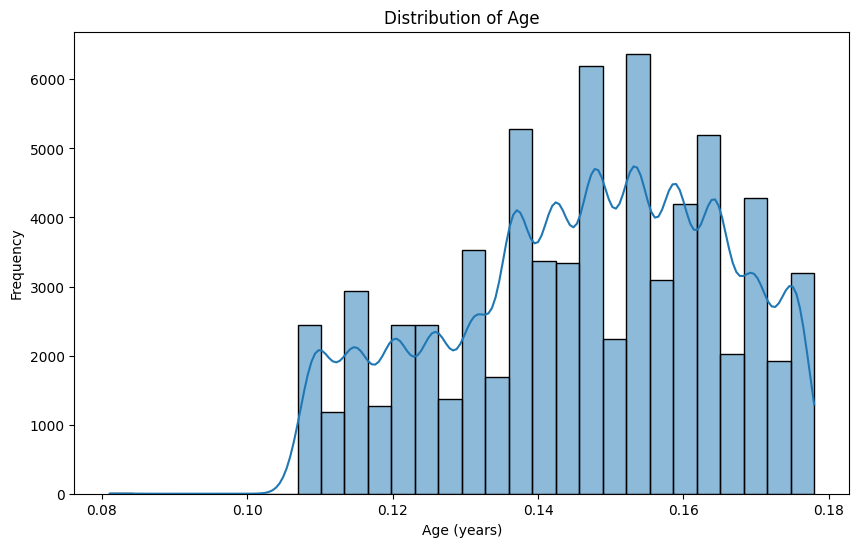

In [11]:
# Data Visualization
# Plot the distribution of 'age' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

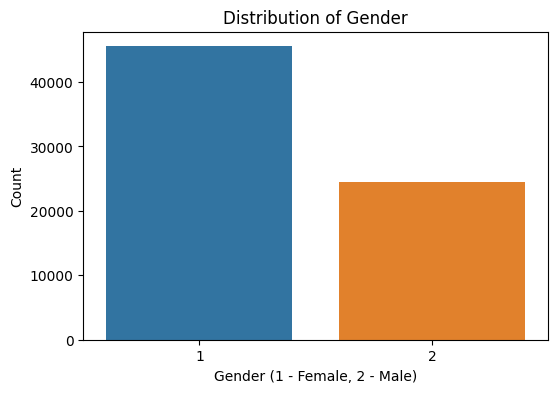

In [13]:
# Plot the distribution of 'gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender (1 - Female, 2 - Male)')
plt.ylabel('Count')
plt.show()

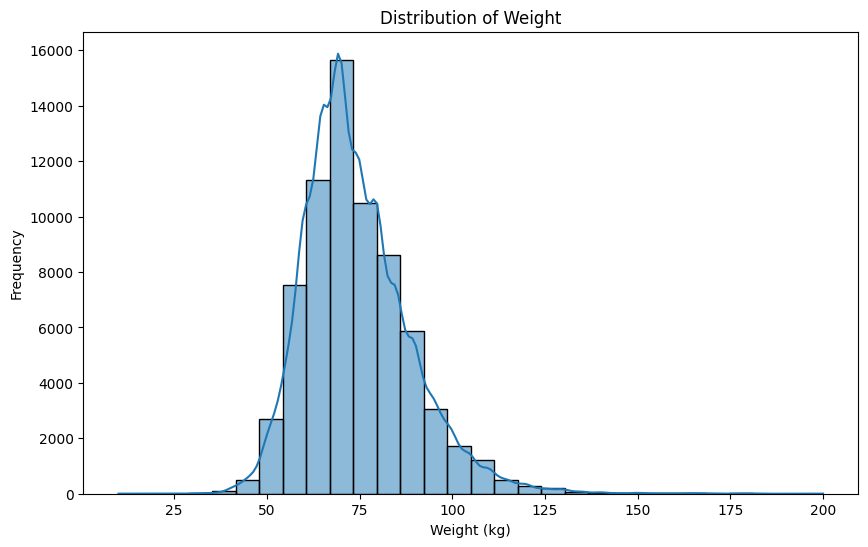

In [15]:
# Plot the distribution of 'weight' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

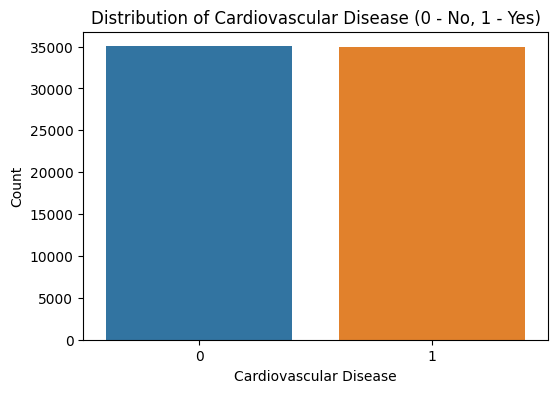

In [16]:
# Plot the distribution of 'cardio' (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cardio')
plt.title('Distribution of Cardiovascular Disease (0 - No, 1 - Yes)')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.show()

In [19]:
# Create a correlation matrix of features
feature_correlation_matrix = df.corr()

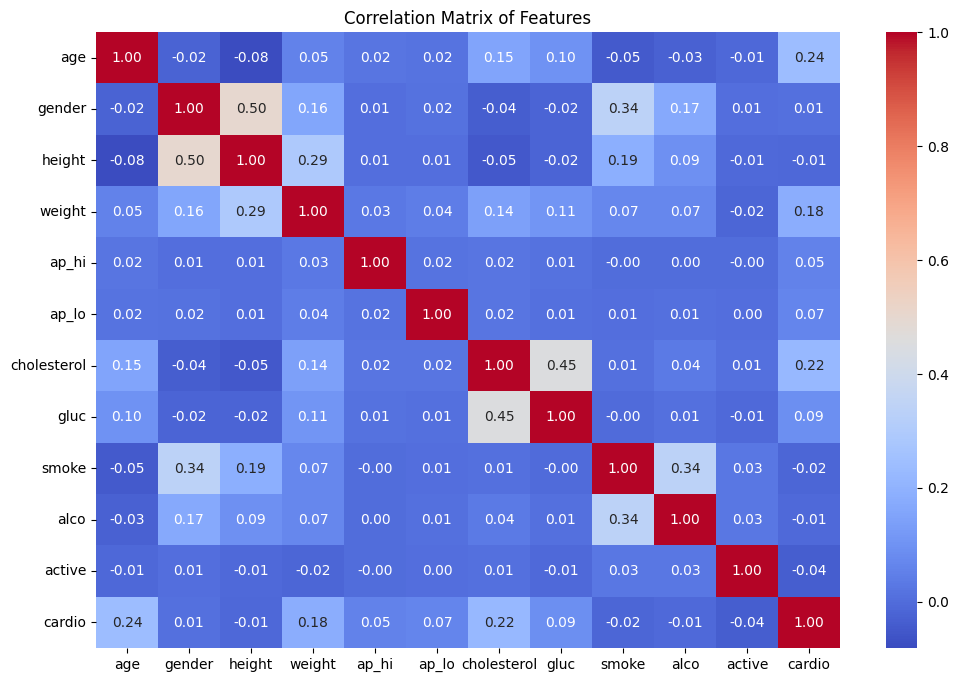

In [18]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [20]:
# Encode categorical variables using LabelEncoder
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [21]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['cardio'])
y = df['cardio']

In [22]:
# Split the data into a training set and a testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features (optional, but often improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
# Initialize and train various machine learning models
models = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

In [25]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

In [26]:
# Evaluate and compare model performance
for model_name, accuracy in results.items():
    print(f'{model_name}: Accuracy = {accuracy:.2f}')

Support Vector Machine: Accuracy = 0.73
K-Nearest Neighbors: Accuracy = 0.65
Decision Tree: Accuracy = 0.63
Logistic Regression: Accuracy = 0.72
Random Forest: Accuracy = 0.71


In [30]:
# Select the best-performing model (e.g., highest accuracy)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]


In [28]:
# Train the best model on the entire dataset
best_model.fit(X, y)


SVC()

In [31]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [32]:
# Save the LabelEncoders and StandardScaler used for preprocessing
for col in categorical_cols:
    joblib.dump(label_encoders[col], f'label_encoder_{col}.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [33]:
# Load your trained model
best_model = joblib.load('best_model.pkl')


In [34]:
# Load your LabelEncoders and StandardScaler used for preprocessing
label_encoders = {}
scaler = StandardScaler()

In [35]:
# Load the LabelEncoders and StandardScaler from files (assuming you saved them during training)
for col in categorical_cols:
    label_encoders[col] = joblib.load(f'label_encoder_{col}.pkl')
scaler = joblib.load('scaler.pkl')

In [36]:
# Create a function to preprocess user input and make predictions
def predict_cardio_disease(age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active):
    # Create a dictionary with user input
    user_data = {
        'age': age,
        'gender': gender,
        'height': height,
        'weight': weight,
        'ap_hi': ap_hi,
        'ap_lo': ap_lo,
        'cholesterol': cholesterol,
        'gluc': gluc,
        'smoke': smoke,
        'alco': alco,
        'active': active
    }
    # Convert gender to integer using the LabelEncoder
    user_data['gender'] = label_encoders['gender'].transform([user_data['gender']])[0]

            # Create a DataFrame from the user input
    user_df = pd.DataFrame([user_data])

                    # Standardize features using the previously trained scaler
    user_df = scaler.transform(user_df)

                            # Make a prediction using the trained model
    prediction = best_model.predict(user_df)

    return prediction

# Example usage:
age = 40
gender = 1  # 1 for male, 2 for female
height = 170
weight = 75
ap_hi = 120
ap_lo = 80
cholesterol = 2  # 1, 2, or 3
gluc = 1  # 1, 2, or 3
smoke = 0  # 0 or 1
alco = 0   # 0 or 1
active = 1 # 0 or 1

prediction = predict_cardio_disease(age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active)

if prediction[0] == 1:
   print("The model predicts that you have a risk of cardiovascular disease.")
else:
   print("The model predicts that you do not have a risk of cardiovascular disease.")


The model predicts that you have a risk of cardiovascular disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
